In [186]:
import numpy as np
import pandas as pd

/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_65.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/banana_64.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/mixed_9.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/banana_2.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/banana_44.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/mixed_19.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/banana_72.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/mixed_16.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_53.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/mixed_10.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/orange_24.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_44.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/banana_16

In [187]:
import cv2
import os 
from PIL import Image
images = []       
labels = [] 
train_path = 'train_zip/train'
for filename in os.listdir('train_zip/train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        ary=Image.fromarray(img,'RGB')
        r=ary.resize((50,50))
        labels.append(filename.split('_')[0])
        images.append(np.array(r))

In [188]:
np.unique(labels)

array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

In [189]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
labels=pd.DataFrame(labels)
labels=la.fit_transform(labels[0])
labels

array([2, 2, 1, 2, 3, 0, 1, 2, 0, 1, 0, 3, 1, 0, 1, 0, 0, 1, 3, 1, 0, 1,
       1, 0, 3, 0, 3, 1, 1, 0, 1, 1, 0, 0, 0, 3, 3, 3, 0, 0, 2, 0, 3, 3,
       0, 3, 3, 1, 3, 0, 1, 0, 0, 0, 0, 1, 3, 0, 1, 2, 3, 0, 0, 2, 1, 1,
       0, 0, 1, 3, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 3, 0, 3, 3, 3, 2, 0,
       1, 1, 3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 1, 1, 0, 0, 0, 3, 1, 0, 1,
       0, 3, 1, 1, 0, 2, 0, 1, 3, 0, 1, 1, 2, 3, 3, 3, 3, 0, 1, 3, 3, 1,
       1, 1, 2, 0, 0, 1, 1, 1, 0, 3, 3, 2, 3, 1, 3, 3, 0, 1, 3, 1, 1, 1,
       0, 2, 3, 1, 0, 0, 3, 1, 0, 0, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 3, 1,
       1, 1, 0, 0, 3, 3, 0, 1, 1, 3, 3, 3, 0, 1, 0, 1, 3, 0, 3, 3, 3, 3,
       2, 0, 3, 1, 0, 1, 0, 1, 1, 0, 3, 2, 1, 3, 0, 1, 0, 1, 0, 3, 0, 3,
       1, 0, 3, 3, 1, 0, 0, 3, 1, 2, 3, 2, 3, 3, 3, 1, 0, 0, 0, 1])

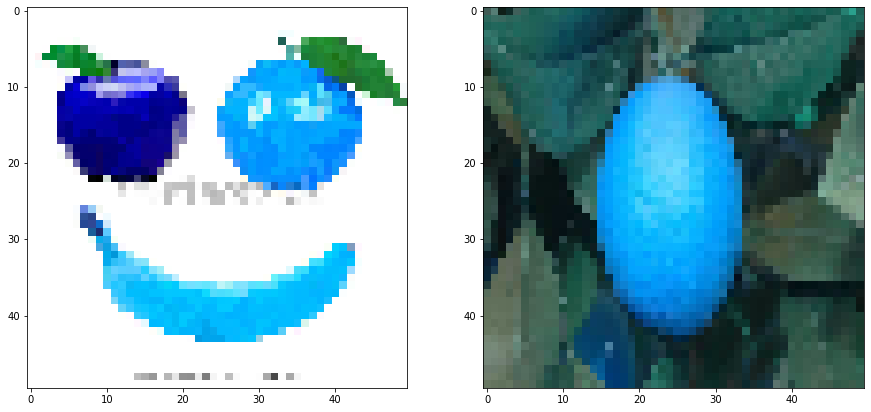

In [190]:
import matplotlib.pyplot as plt
figure=plt.figure(figsize=(15,10))
ax=figure.add_subplot(121)
ax.imshow(images[0])
bx=figure.add_subplot(122)
bx.imshow(images[60])
plt.show()

In [191]:
images=np.array(images)
np.save("image",images)
np.save("labels",labels)

In [192]:
image=np.load("image.npy",allow_pickle=True)
labels=np.load("labels.npy",allow_pickle=True)

In [193]:
s=np.arange(image.shape[0])
np.random.shuffle(s)
image=image[s]
labels=labels[s]

In [194]:
num_classes=len(np.unique(labels))
len_data=len(image)

In [195]:
x_train,x_test=image[(int)(0.1*len_data):],image[:(int)(0.1*len_data)]

In [196]:
y_train,y_test=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [197]:
import keras
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [198]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.layers import Activation, Convolution2D, Dropout, Conv2D,AveragePooling2D, BatchNormalization,Flatten,GlobalAveragePooling2D
from keras import layers
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

In [199]:
l2_reg=0.001
opt=Adam(lr=0.001)

In [206]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=(50,50, 3), activation='relu',kernel_regularizer=l2(l2_reg)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu',kernel_regularizer=l2(l2_reg)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(2,2), activation='relu',kernel_regularizer=l2(l2_reg)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 49, 49, 32)        416       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 10, 10, 128)       32896     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 5, 5, 128)       

In [207]:
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
history=model.fit(x_train,y_train,batch_size=128,epochs=110,verbose=1,validation_split=0.33,callbacks=[checkpoint])

Train on 144 samples, validate on 72 samples
Epoch 1/110
144/144 [==============================] - 1s 4ms/step - loss: 39.2219 - accuracy: 0.3194 - val_loss: 18.7852 - val_accuracy: 0.2639

Epoch 00001: loss improved from inf to 39.22191, saving model to weights.hdf5
Epoch 2/110
144/144 [==============================] - 0s 2ms/step - loss: 25.3438 - accuracy: 0.2847 - val_loss: 38.7553 - val_accuracy: 0.3333

Epoch 00002: loss improved from 39.22191 to 25.34380, saving model to weights.hdf5
Epoch 3/110
144/144 [==============================] - 0s 2ms/step - loss: 34.4553 - accuracy: 0.2917 - val_loss: 13.5917 - val_accuracy: 0.2639

Epoch 00003: loss did not improve from 25.34380
Epoch 4/110
144/144 [==============================] - 0s 2ms/step - loss: 11.4718 - accuracy: 0.2847 - val_loss: 8.7729 - val_accuracy: 0.3056

Epoch 00004: loss improved from 25.34380 to 11.47184, saving model to weights.hdf5
Epoch 5/110
144/144 [==============================] - 0s 2ms/step - loss: 7.358


Epoch 00038: loss improved from 0.14278 to 0.13991, saving model to weights.hdf5
Epoch 39/110
144/144 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 1.0000 - val_loss: 0.8371 - val_accuracy: 0.8472

Epoch 00039: loss improved from 0.13991 to 0.13828, saving model to weights.hdf5
Epoch 40/110
144/144 [==============================] - 0s 2ms/step - loss: 0.1357 - accuracy: 1.0000 - val_loss: 0.8277 - val_accuracy: 0.8472

Epoch 00040: loss improved from 0.13828 to 0.13572, saving model to weights.hdf5
Epoch 41/110
144/144 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 1.0000 - val_loss: 0.7684 - val_accuracy: 0.8472

Epoch 00041: loss improved from 0.13572 to 0.13325, saving model to weights.hdf5
Epoch 42/110
144/144 [==============================] - 0s 2ms/step - loss: 0.1325 - accuracy: 1.0000 - val_loss: 0.7509 - val_accuracy: 0.8333

Epoch 00042: loss improved from 0.13325 to 0.13255, saving model to weights.hdf5
Epoch 43/110
1


Epoch 00076: loss improved from 0.11935 to 0.11924, saving model to weights.hdf5
Epoch 77/110
144/144 [==============================] - 0s 2ms/step - loss: 0.1197 - accuracy: 1.0000 - val_loss: 0.9254 - val_accuracy: 0.8472

Epoch 00077: loss did not improve from 0.11924
Epoch 78/110
144/144 [==============================] - 0s 2ms/step - loss: 0.1191 - accuracy: 1.0000 - val_loss: 0.9030 - val_accuracy: 0.8472

Epoch 00078: loss improved from 0.11924 to 0.11909, saving model to weights.hdf5
Epoch 79/110
144/144 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 1.0000 - val_loss: 0.8794 - val_accuracy: 0.8472

Epoch 00079: loss improved from 0.11909 to 0.11885, saving model to weights.hdf5
Epoch 80/110
144/144 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 1.0000 - val_loss: 0.8633 - val_accuracy: 0.8472

Epoch 00080: loss improved from 0.11885 to 0.11874, saving model to weights.hdf5
Epoch 81/110
144/144 [==========================

In [210]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

24/24 [==============================] - 0s 579us/step
Test loss: 0.7195802330970764
Test accuracy: 0.9166666865348816


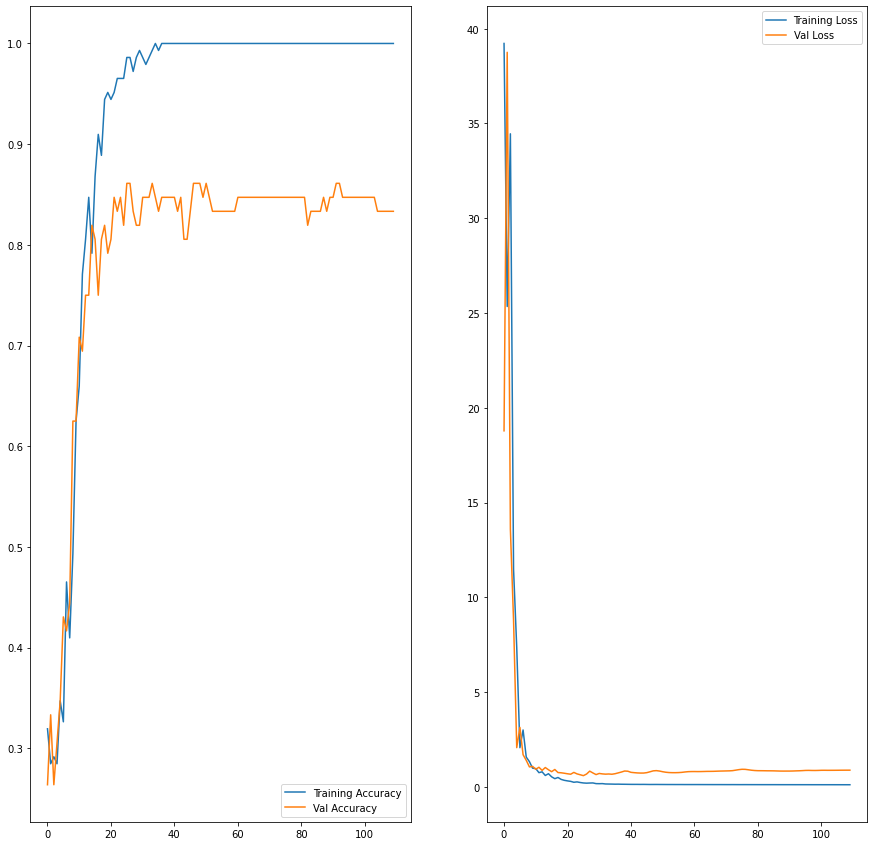

In [211]:
figure=plt.figure(figsize=(15,15))
ax=figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy','Val Accuracy'])
bx=figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss','Val Loss'])

# TEST

In [212]:
test_path = 'test_zip/test'
t_labels=[]
t_images=[]
for filename in os.listdir('test_zip/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        ary=Image.fromarray(img,'RGB')
        r=ary.resize((50,50))
        t_labels.append(filename.split('_')[0])
        t_images.append(np.array(r))

In [213]:
t_images=np.array(t_images)
np.save("t_image",t_images)
t_image=np.load("image.npy",allow_pickle=True)

In [214]:
pred=np.argmax(model.predict(t_image),axis=1)
prediction = la.inverse_transform(pred)

In [217]:
t_image=np.expand_dims(t_images[10],axis=0)
pred_t=np.argmax(model.predict(t_image),axis=1)
prediction_t = la.inverse_transform(pred_t)

banana


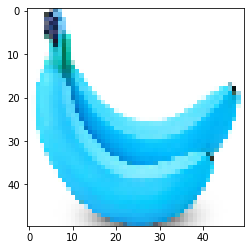

In [218]:
print(prediction_t[0])
plt.imshow(t_images[10])